1. 1차원데이터분석

1.** 변수종류파악( 수치형/ 범주형/ 시간형)

2.** 변수종류별분석지표( 수치형/ 범주형/ 시간형)

3.** 시각화

- 도수분포표/ 히스토그램/ 상자그림

2. 2차원데이터분석

1.** 공분산/ 상관계수

2.** 다중공선성확인

3.** 시각화

- 산점도/ 회귀직선/ 히트맵
## 항공사 지연요인 데이터 탐색적 분석
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

- 수치형/범주형변수

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글폰트 검색
# 폰트 굴림체 있는지 확인
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') != -1 :
        print(i.name)
        
# 폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

New Gulim
Gulim


In [75]:
df = pd.read_csv('./data/airline_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [76]:
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


범주형 변수: airline
수치형 변수: pct_carrier_delay

In [77]:
df.pct_atc_delay.describe()

count    33440.000000
mean         5.089962
std          4.718647
min          0.000000
25%          2.146565
50%          3.900000
75%          6.630238
max        100.000000
Name: pct_atc_delay, dtype: float64

In [78]:
df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


In [79]:
# 수치형 변수의 최대/최소/대표값
df.select_dtypes(include='number').describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [80]:
# 수치형 변수의 최대/최소/대표값
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [81]:
# 범주형 변수의 값목록
df.airline.unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [82]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [83]:
# 항공사별 기술통계 비교
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


In [84]:
# 결측치 확인
df.isnull().sum()
df[df.isnull().any(axis=1)]

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
4809,NaN,NaN,NaN,Jet Blue
6123,NaN,NaN,NaN,Jet Blue
7069,NaN,NaN,NaN,Delta
9241,NaN,NaN,NaN,Delta
12081,NaN,NaN,NaN,United
12541,NaN,NaN,NaN,United
13058,NaN,NaN,NaN,United
13534,NaN,NaN,NaN,United
13547,NaN,NaN,NaN,United
13996,NaN,NaN,NaN,United


In [85]:
# 결측치 중앙값으로 대체
df['pct_carrier_delay'] = df['pct_carrier_delay'].fillna(df['pct_carrier_delay'].median())
df['pct_atc_delay'] = df['pct_atc_delay'].fillna(df['pct_atc_delay'].median())
df['pct_weather_delay'] = df['pct_weather_delay'].fillna(df['pct_weather_delay'].median())
df.isnull().sum()

pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

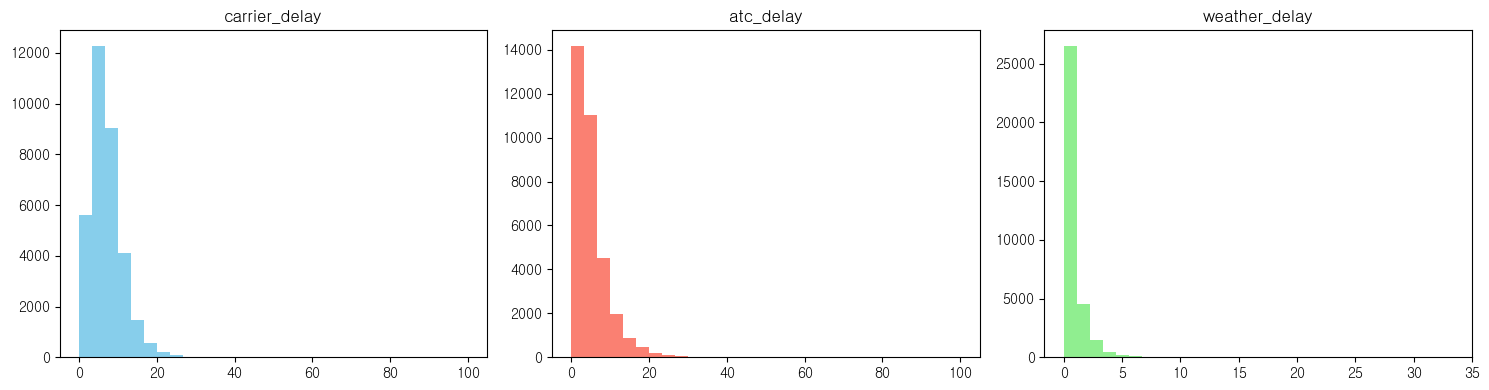

In [87]:
# 히스토그램
fig = plt.figure(figsize=(15,4))
axes1= fig.add_subplot(1,3,1)
axes2=fig.add_subplot(1,3,2)
axes3=fig.add_subplot(1,3,3)

axes1.hist(data=df, x='pct_carrier_delay', bins=30, color='skyblue')
axes2.hist(data=df, x='pct_atc_delay', bins=30, color='salmon')
axes3.hist(data=df, x='pct_weather_delay', bins=30, color='lightgreen')

axes1.set_title('carrier_delay')
axes2.set_title('atc_delay')
axes3.set_title('weather_delay')

plt.tight_layout()
plt.show()

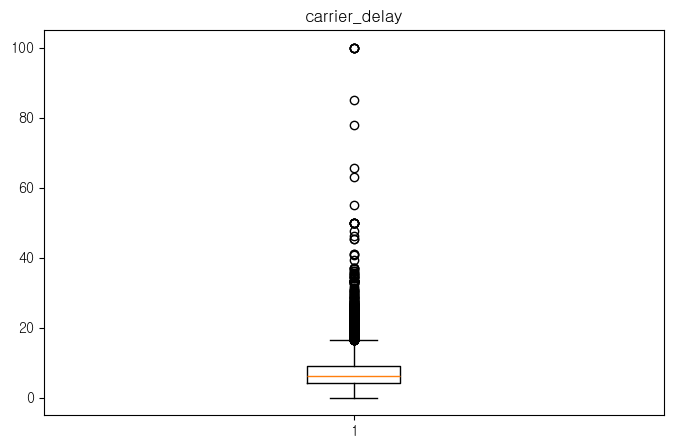

In [88]:
# 박스플롯
fig = plt.figure(figsize=(8,5))
axes= fig.add_subplot(1,1,1) 
axes.boxplot(data=df, x='pct_carrier_delay')
axes.set_title('carrier_delay')
plt.show()

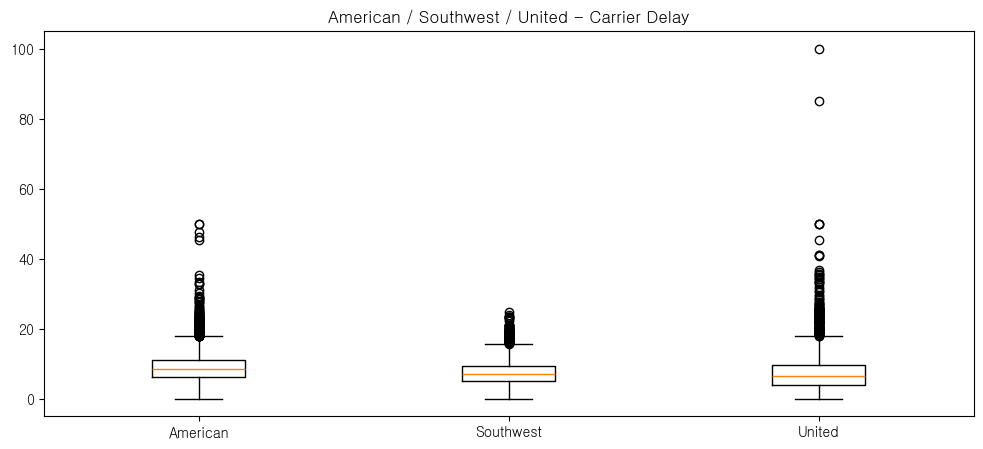

In [97]:
# 박스플롯
fig = plt.figure(figsize=(12,5))
axes= fig.add_subplot(1,1,1) 
axes.boxplot(
    x=[
        df[df['airline']=='American']['pct_carrier_delay'],
        df[df['airline']=='Southwest']['pct_carrier_delay'],
        df[df['airline']=='United']['pct_carrier_delay'] 
    ],
    tick_labels=['American', 'Southwest', 'United']
)
plt.title('American / Southwest / United - Carrier Delay')
plt.show()

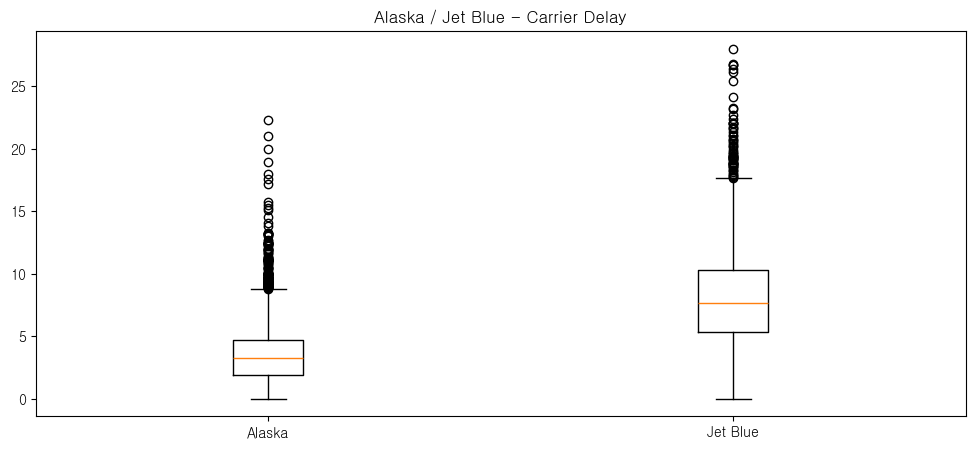

In [92]:
# 박스플롯
fig = plt.figure(figsize=(12,5))
axes= fig.add_subplot(1,1,1) 
axes.boxplot(
    x=[
        df[df['airline']=='Alaska']['pct_carrier_delay'],
        df[df['airline']=='Jet Blue']['pct_carrier_delay']
    ],
    tick_labels=['Alaska', 'Jet Blue']
)
plt.title('Alaska / Jet Blue - Carrier Delay')
plt.show()

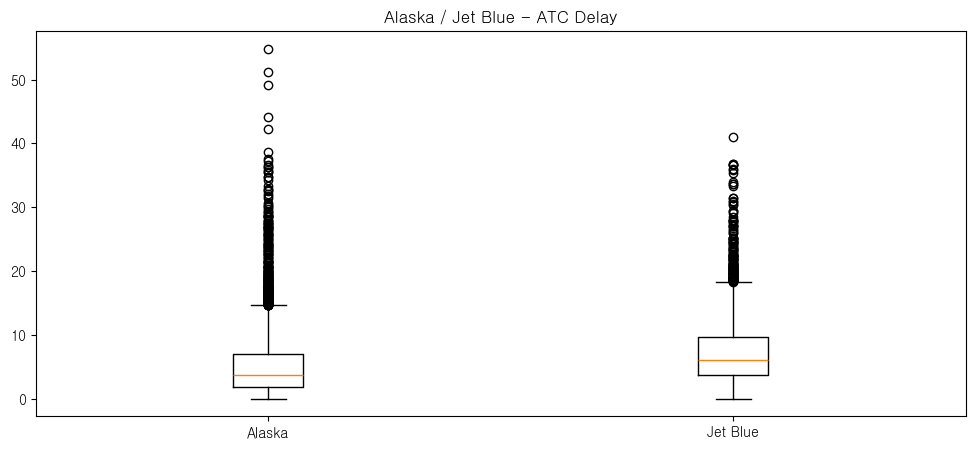

In [ ]:
# 박스플롯
fig = plt.figure(figsize=(12,5))
axes= fig.add_subplot(1,1,1) 
axes.boxplot(
    x=[
        df[df['airline']=='Alaska']['pct_atc_delay'],
        df[df['airline']=='Jet Blue']['pct_atc_delay']
    ],
    tick_labels=['Alaska', 'Jet Blue']
)
plt.title('Alaska / Jet Blue - ATC Delay')
plt.show()

In [ ]:
# 공분산
df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].cov()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,20.211833,3.064223,0.779358
pct_atc_delay,3.064223,22.248182,0.464736
pct_weather_delay,0.779358,0.464736,1.152074


In [ ]:
# 상관계수
df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144501,0.161508
pct_atc_delay,0.144501,1.000000,0.091795
pct_weather_delay,0.161508,0.091795,1.000000


In [108]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             feature       VIF
0  pct_carrier_delay  2.059321
1      pct_atc_delay  1.860160
2  pct_weather_delay  1.414689


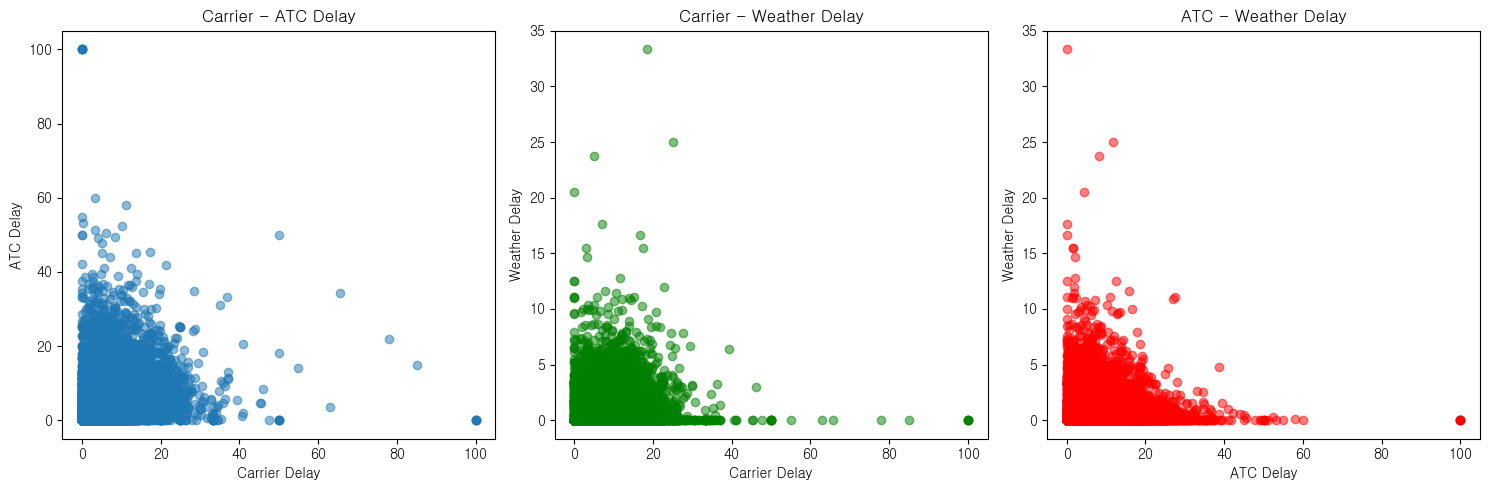

In [111]:
# 시각화
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df['pct_carrier_delay'], df['pct_atc_delay'], alpha=0.5)
plt.xlabel('Carrier Delay')
plt.ylabel('ATC Delay')
plt.title('Carrier - ATC Delay')

plt.subplot(1,3,2)
plt.scatter(df['pct_carrier_delay'], df['pct_weather_delay'], alpha=0.5, color='green')
plt.xlabel('Carrier Delay')
plt.ylabel('Weather Delay')
plt.title('Carrier - Weather Delay')

plt.subplot(1,3,3)
plt.scatter(df['pct_atc_delay'], df['pct_weather_delay'], alpha=0.5, color='red')
plt.xlabel('ATC Delay')
plt.ylabel('Weather Delay')
plt.title('ATC - Weather Delay')

plt.tight_layout()
plt.show()


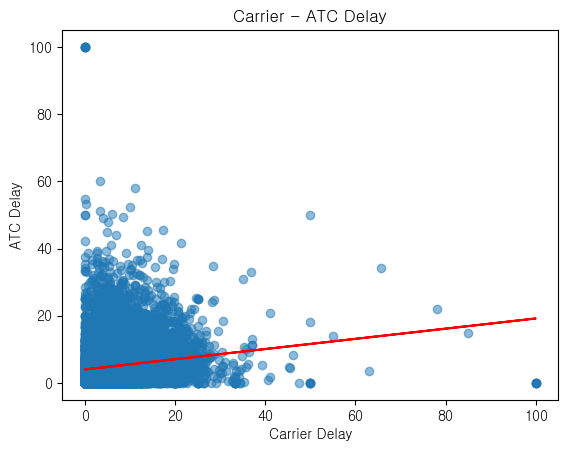

In [114]:
import numpy as np

x = df['pct_carrier_delay'].dropna()
y = df['pct_atc_delay'].dropna()

# 교집합 인덱스 맞추기
common_idx = x.index.intersection(y.index)
x = x.loc[common_idx]
y = y.loc[common_idx]

coeff = np.polyfit(x, y, 1)
poly_eq = np.poly1d(coeff)

plt.scatter(x, y, alpha=0.5)
plt.plot(x, poly_eq(x), color='red')
plt.xlabel('Carrier Delay')
plt.ylabel('ATC Delay')
plt.title('Carrier - ATC Delay')
plt.show()

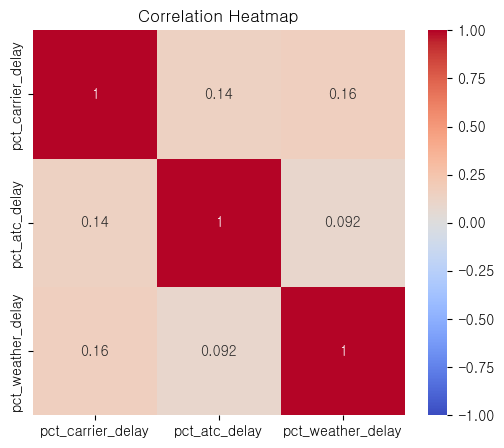

In [115]:
import seaborn as sns

corr_matrix = df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
